# 对IMBD数据集源数据进行数据分析

## 1.导入相关包

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 2.读取数据集以及进行数据探索

In [11]:
# 读取数据集
df = pd.read_csv('minidatasets.csv')

# # 设置nltk数据路径
# nltk.data.path.append('E:\Private\PythonProject\GraduationThesis\NLTK\nltk_data-gh-pages')

# 数据探查
print('数据基本信息：')
df.info()
# 查看数据集行数和列数
rows, columns = df.shape
if rows < 100 and columns < 20:
    # 短表数据（行数少于100且列数少于20）查看全量数据信息
    print('数据全部内容信息：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    # 长表数据查看数据前几行信息
    print('数据前几行内容信息：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))


数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   labels     5000 non-null   int64 
 1   sentences  5000 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.3+ KB
数据前几行内容信息：
	labels	sentences
0	0	This film really disappointed me The acting is atrocious Unbelievable And its about actors The story is incredibly obvious A group of independent actors stage a Passion Play and in turn they start to live out the lives of the characters they play Ive been watching a lot of movies lately thanks to Netflix and this is the first one I havent watched all the way through in a long time I felt I didnt need to see the end we all know the end of this story For some it seems this modernization of the Gospels is either sacrilegious or enlightening I cannot speak to any of this as I wasnt raised in the Christian church That being said I was raised i

## 3.统计不同情感标签的数量

不同情感标签的数量：
labels
1    2504
0    2496
Name: count, dtype: int64


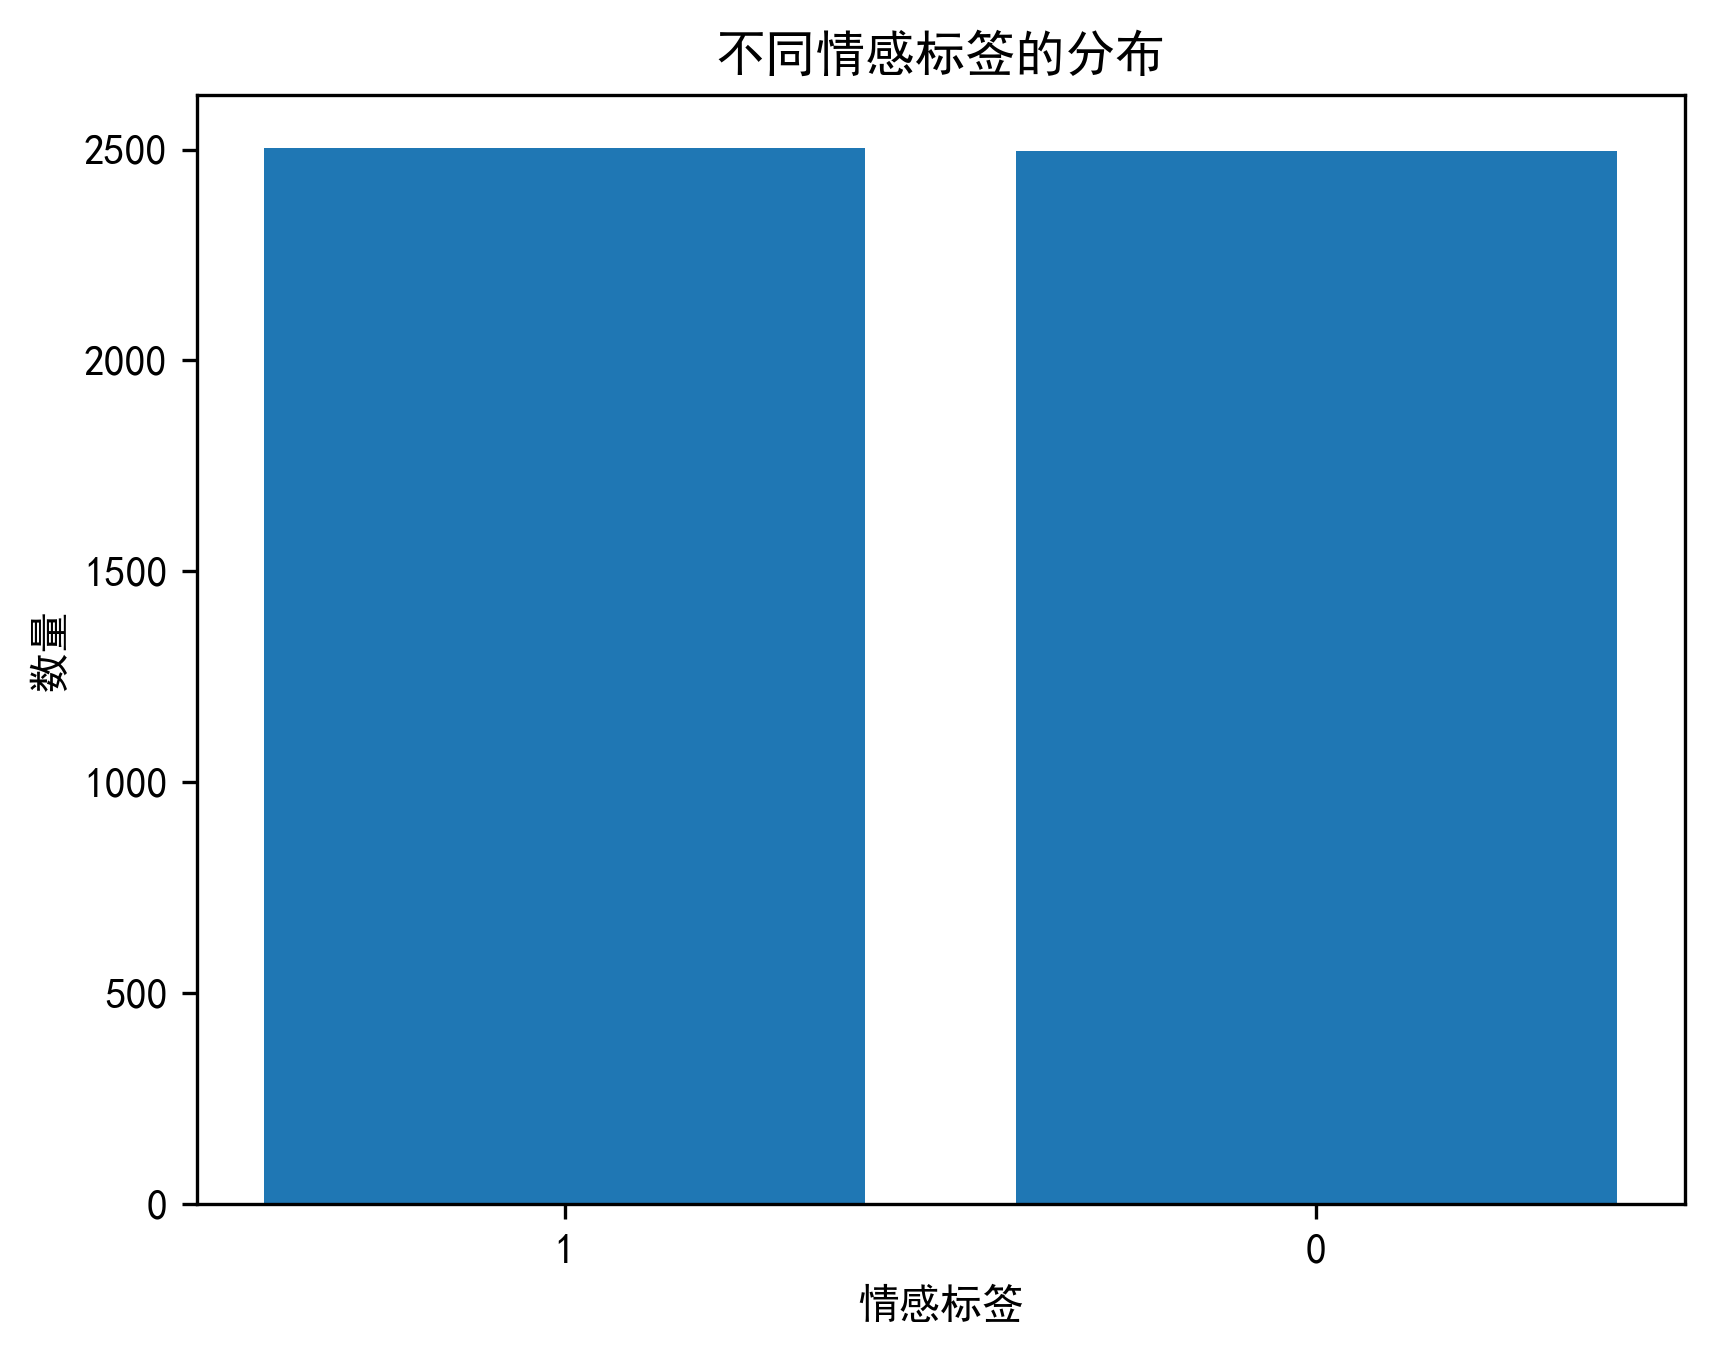

In [14]:
# 1. 情感标签分布
# 统计不同情感标签的数量
label_counts = df['labels'].value_counts()
print('不同情感标签的数量：')
print(label_counts)
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 绘制柱状图
plt.bar(label_counts.index.astype(str), label_counts)
plt.xlabel('情感标签')
plt.xticks()
plt.ylabel('数量')
plt.title('不同情感标签的分布')
plt.show()

## 4.影评长度分析

影评长度的描述性统计信息：
count    5000.00
mean     1241.11
std       941.18
min       100.00
25%       668.75
50%       913.50
75%      1512.25
max      8406.00
Name: sentence_length, dtype: float64


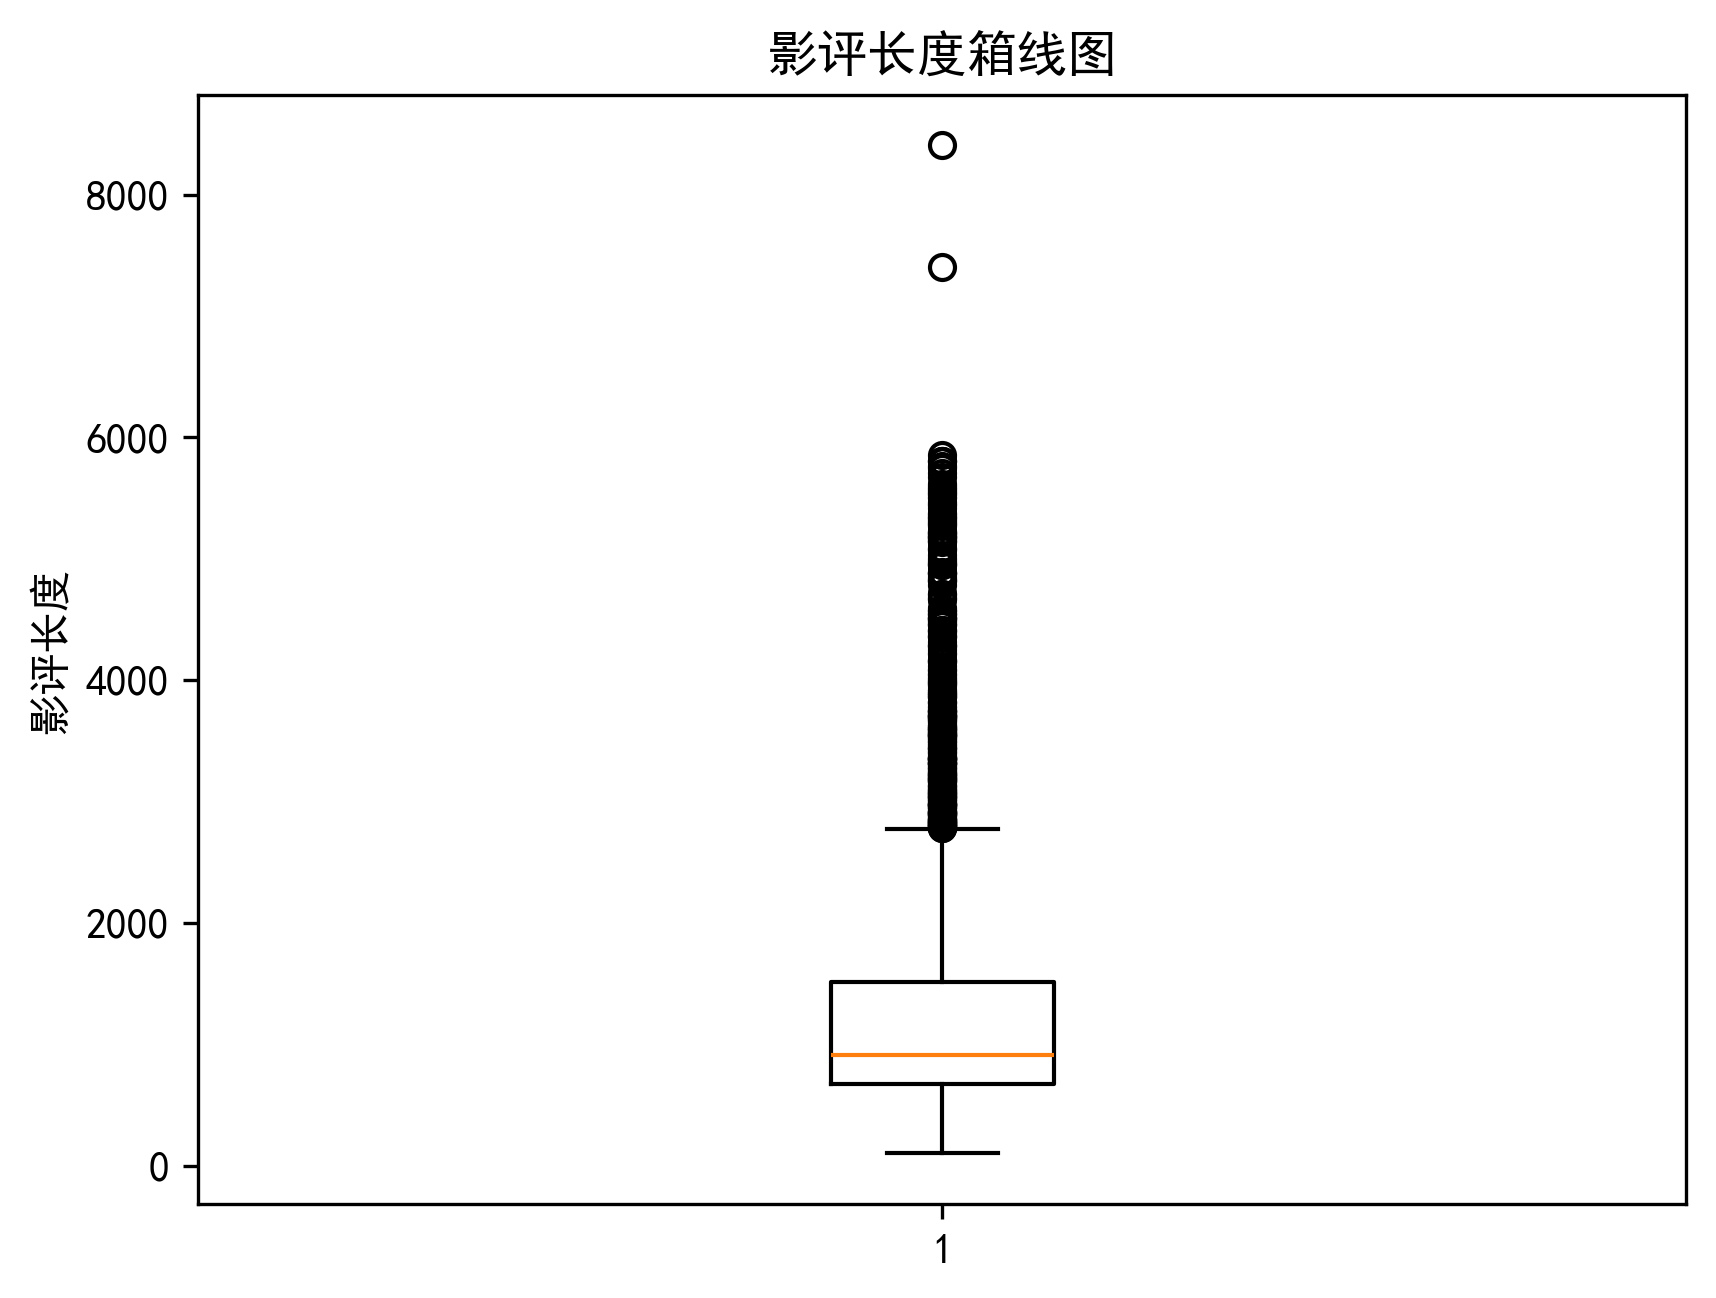

In [15]:
# 2. 影评长度分析
# 计算影评长度
df['sentence_length'] = df['sentences'].apply(len)
# 查看影评长度的描述性统计信息（保留两位小数）
length_stats = df['sentence_length'].describe().round(2)
print('影评长度的描述性统计信息：')
print(length_stats)
# 绘制箱线图
plt.boxplot(df['sentence_length'])
plt.ylabel('影评长度')
plt.title('影评长度箱线图')
plt.show()

## 5.不同情感标签下的平均影评长度

不同情感标签下的平均影评长度：
labels
0    1245.02
1    1237.20
Name: sentence_length, dtype: float64


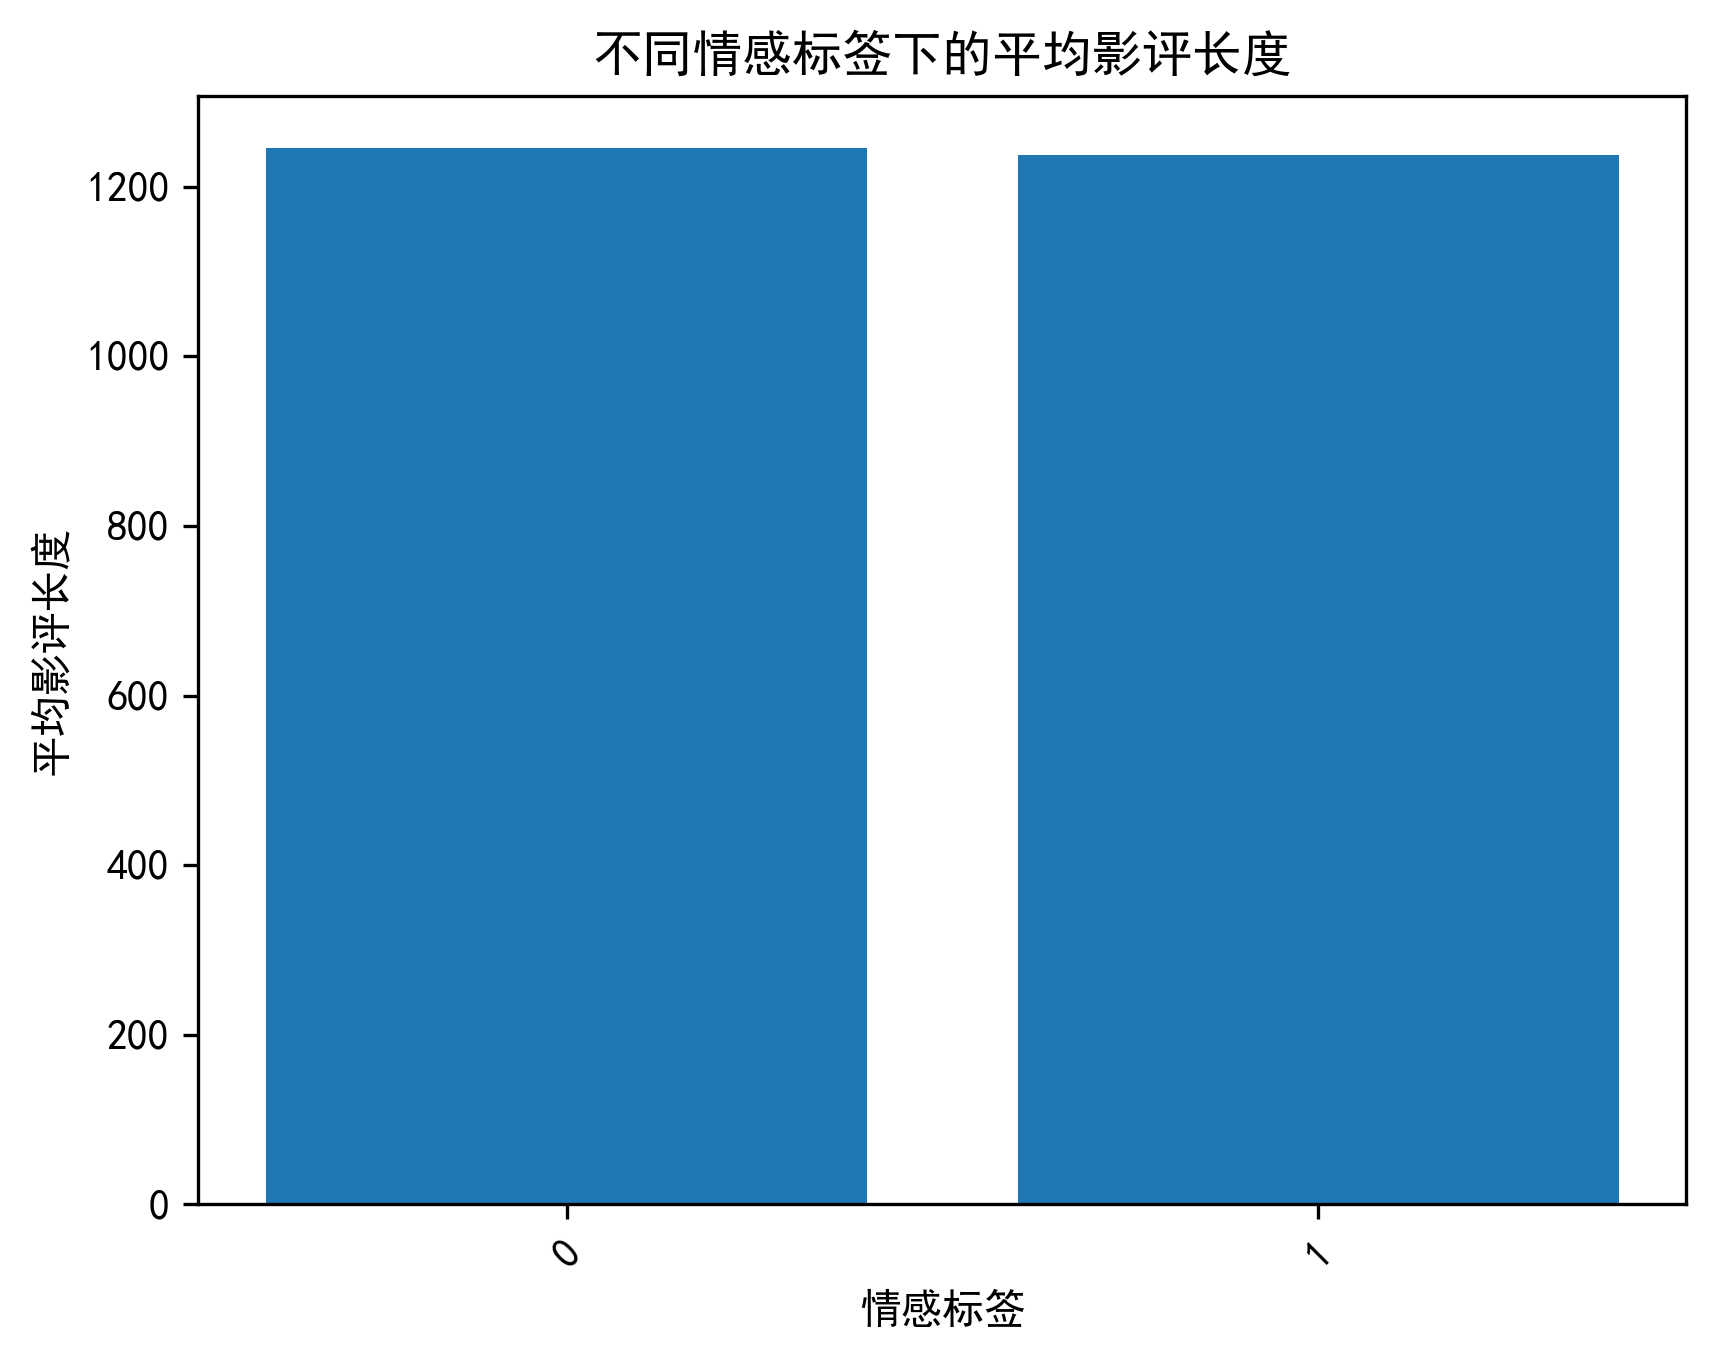

In [17]:
# 3. 不同情感标签下的平均影评长度
# 计算不同情感标签下的平均影评长度（保留两位小数）
average_length_by_label = df.groupby('labels')['sentence_length'].mean().round(2)
print('不同情感标签下的平均影评长度：')
print(average_length_by_label)

# 绘制柱状图
plt.bar(average_length_by_label.index.astype(str), average_length_by_label)
plt.xlabel('情感标签')
plt.xticks(rotation=45)
plt.ylabel('平均影评长度')
plt.title('不同情感标签下的平均影评长度')
plt.show()

## 6.词频分析

前20个出现频率最高的词：
[('movie', 8658), ('film', 7529), ('one', 5269), ('like', 3864), ('good', 2994), ('even', 2505), ('time', 2430), ('would', 2385), ('story', 2303), ('see', 2187), ('really', 2175), ('much', 1957), ('well', 1910), ('bad', 1877), ('get', 1817), ('people', 1808), ('also', 1762), ('dont', 1741), ('first', 1740), ('great', 1710), ('movies', 1640), ('films', 1579), ('make', 1545), ('could', 1524), ('made', 1513), ('characters', 1487), ('way', 1485), ('think', 1364), ('watch', 1341), ('love', 1317), ('seen', 1310), ('two', 1299), ('many', 1298), ('character', 1290), ('never', 1285), ('acting', 1271), ('plot', 1259), ('know', 1234), ('best', 1234), ('little', 1224), ('ever', 1200), ('life', 1193), ('better', 1157), ('show', 1138), ('still', 1120), ('end', 1102), ('scenes', 1041), ('man', 1031), ('say', 1018), ('scene', 1015)]


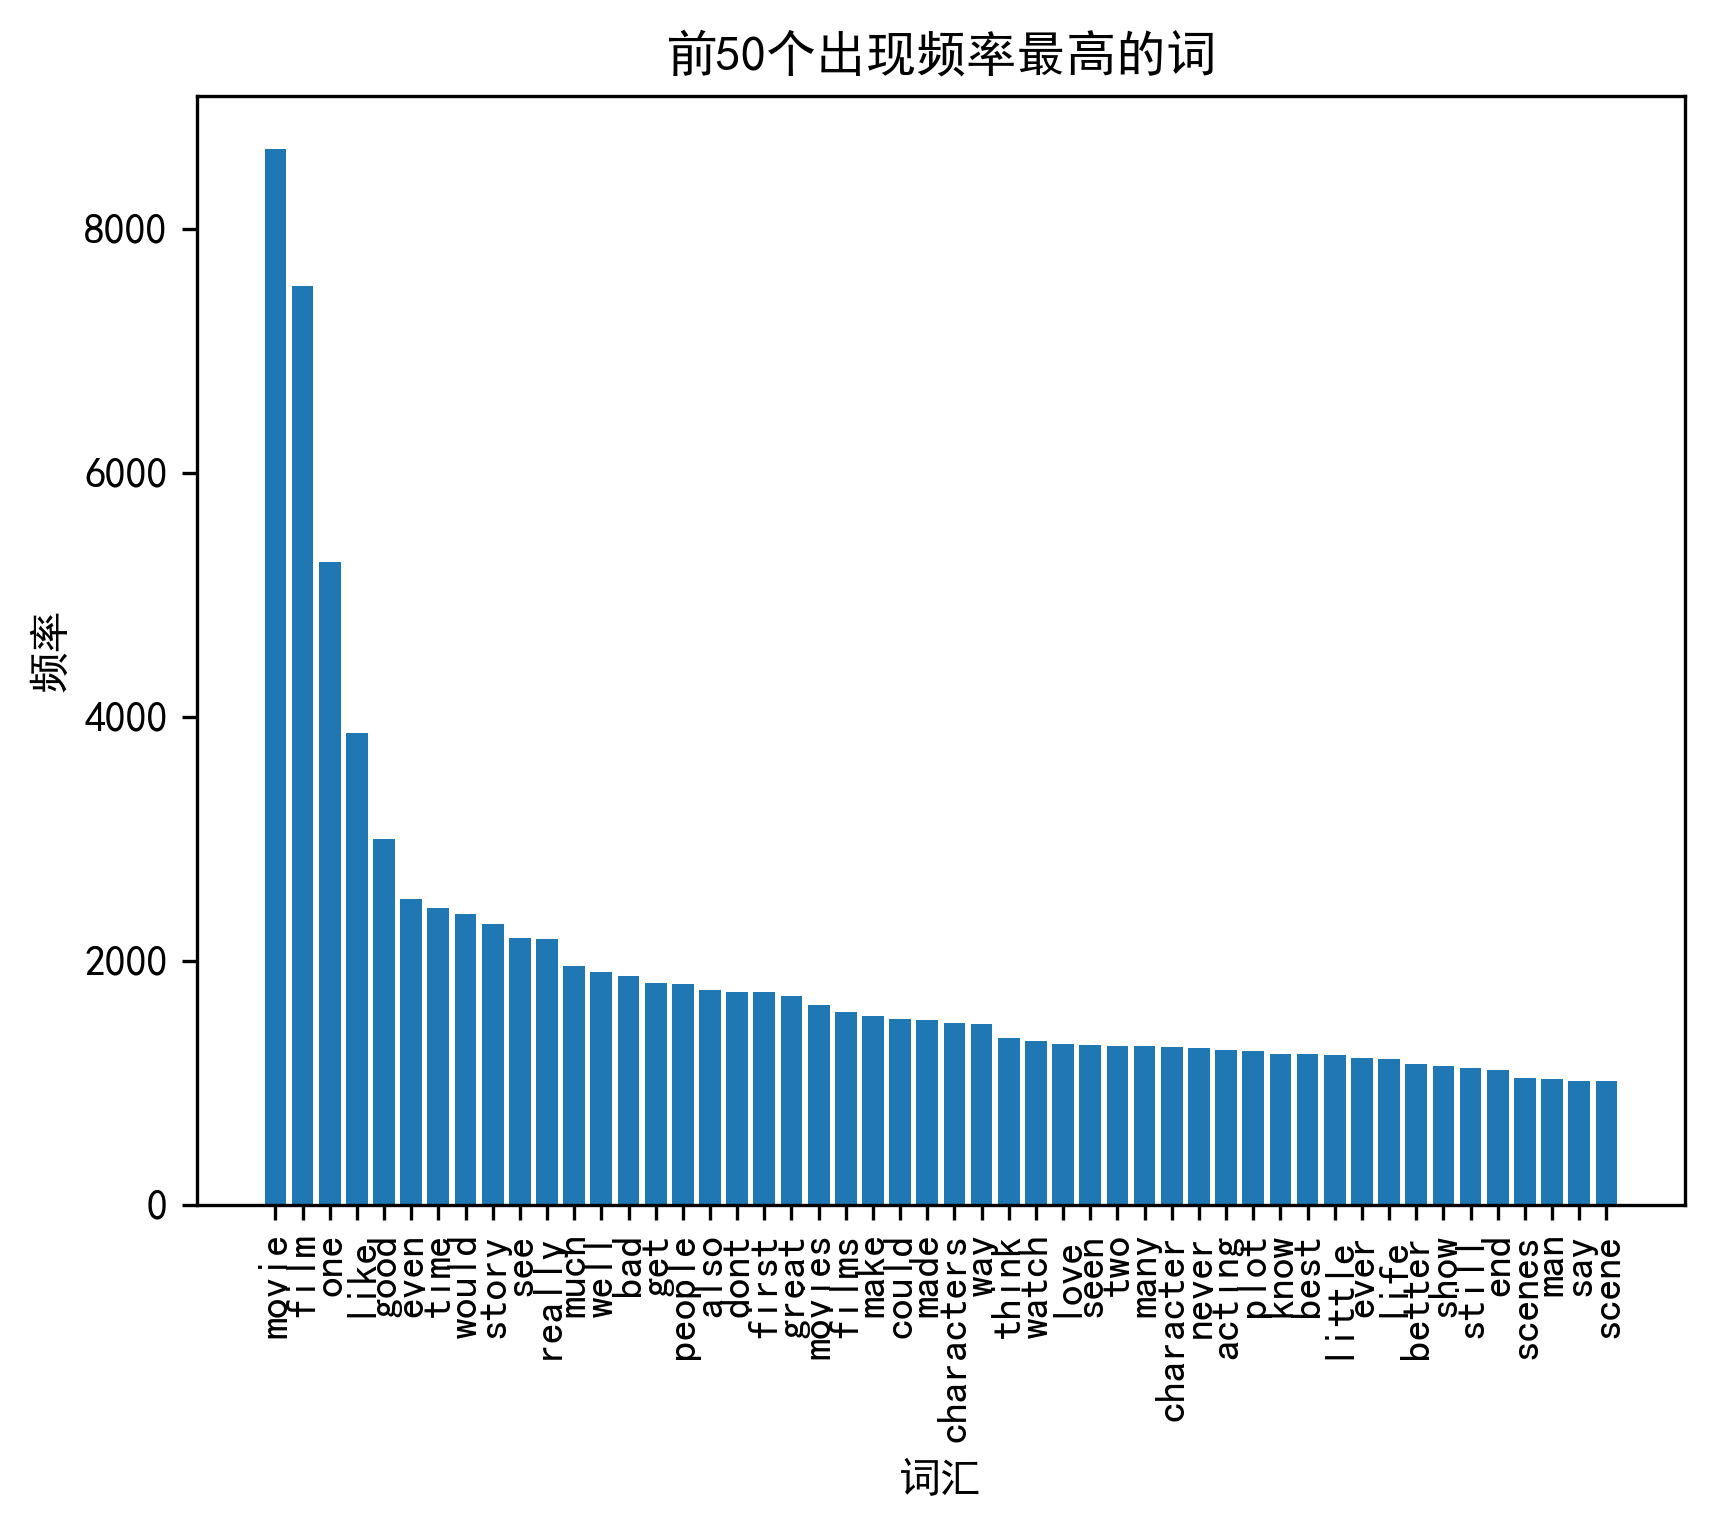

In [18]:
# 获取英文停用词
stop_words = set(stopwords.words('english'))

# 定义函数来进行文本预处理
def preprocess_text(text):
    # 将文本转换为小写
    text = text.lower()
    # 分词
    tokens = word_tokenize(text)
    # 去除停用词和非字母字符
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

# 对影评内容进行预处理
df['processed_sentences'] = df['sentences'].apply(preprocess_text)

# 合并所有影评的词
all_words = [word for sublist in df['processed_sentences'] for word in sublist]

# 统计词频
word_freq = Counter(all_words)

# 获取前50个出现频率最高的词
top_50_words = word_freq.most_common(50)

print('前20个出现频率最高的词：')
print(top_50_words)
# 提取词和频率用于绘图
words, frequencies = zip(*top_50_words)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制柱状图
plt.bar(words, frequencies)
plt.xlabel('词汇')
plt.xticks(rotation=90)
plt.ylabel('频率')
plt.title('前50个出现频率最高的词')
plt.show()

## 7.词云图

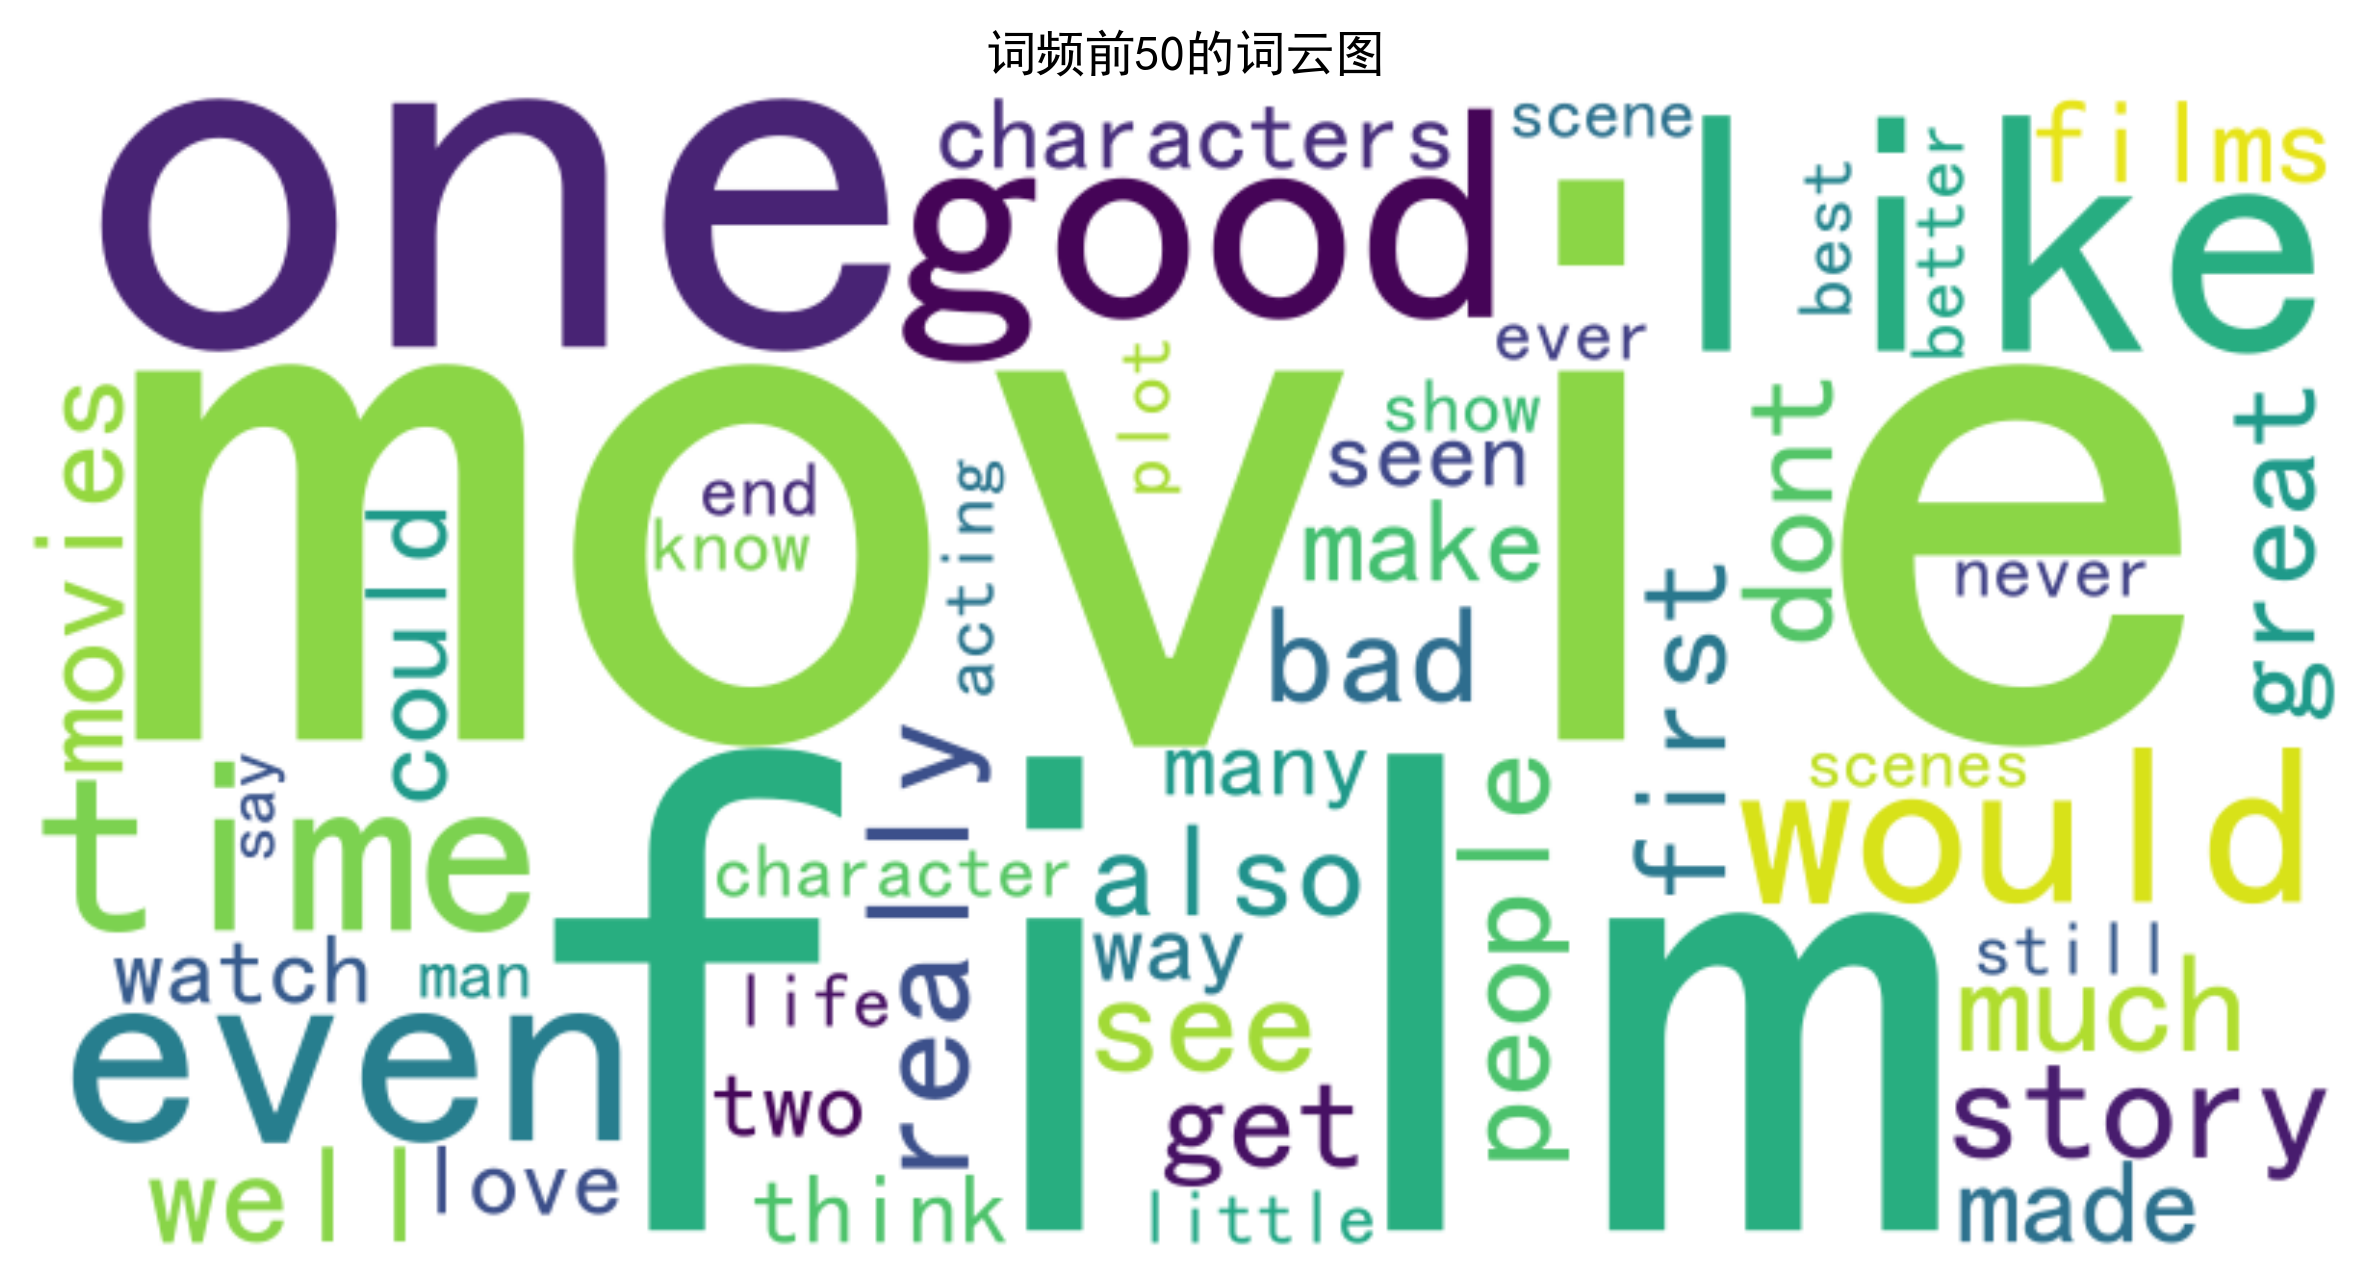

In [10]:
# 转换为适合词云生成的字典格式
word_freq_dict = dict(top_50_words)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体，这里以 SimHei 为例，你可以根据自己系统更换合适的中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 生成词云
wordcloud = WordCloud(font_path='C:/Windows/Fonts/simhei.ttf',  # 指定中文字体路径，根据实际情况修改
                      background_color='white',
                      width=800,
                      height=400).generate_from_frequencies(word_freq_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('词频前50的词云图')
plt.show()

# 对抓取到的imdb数据集进行数据分析

## 1.导入相关包

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

## 2.读取数据文件

In [ ]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 读取 Excel 文件
excel_file = pd.ExcelFile('reviewList.xlsx')
# 获取指定工作表中的数据
df = excel_file.parse('Sheet1')

## 3.评分分布情况

评分的描述性统计信息：
   index    star
0  count  898.00
1   mean    8.41
2    std    2.14
3    min    1.00
4    25%    7.00
5    50%    9.00
6    75%   10.00
7    max   10.00


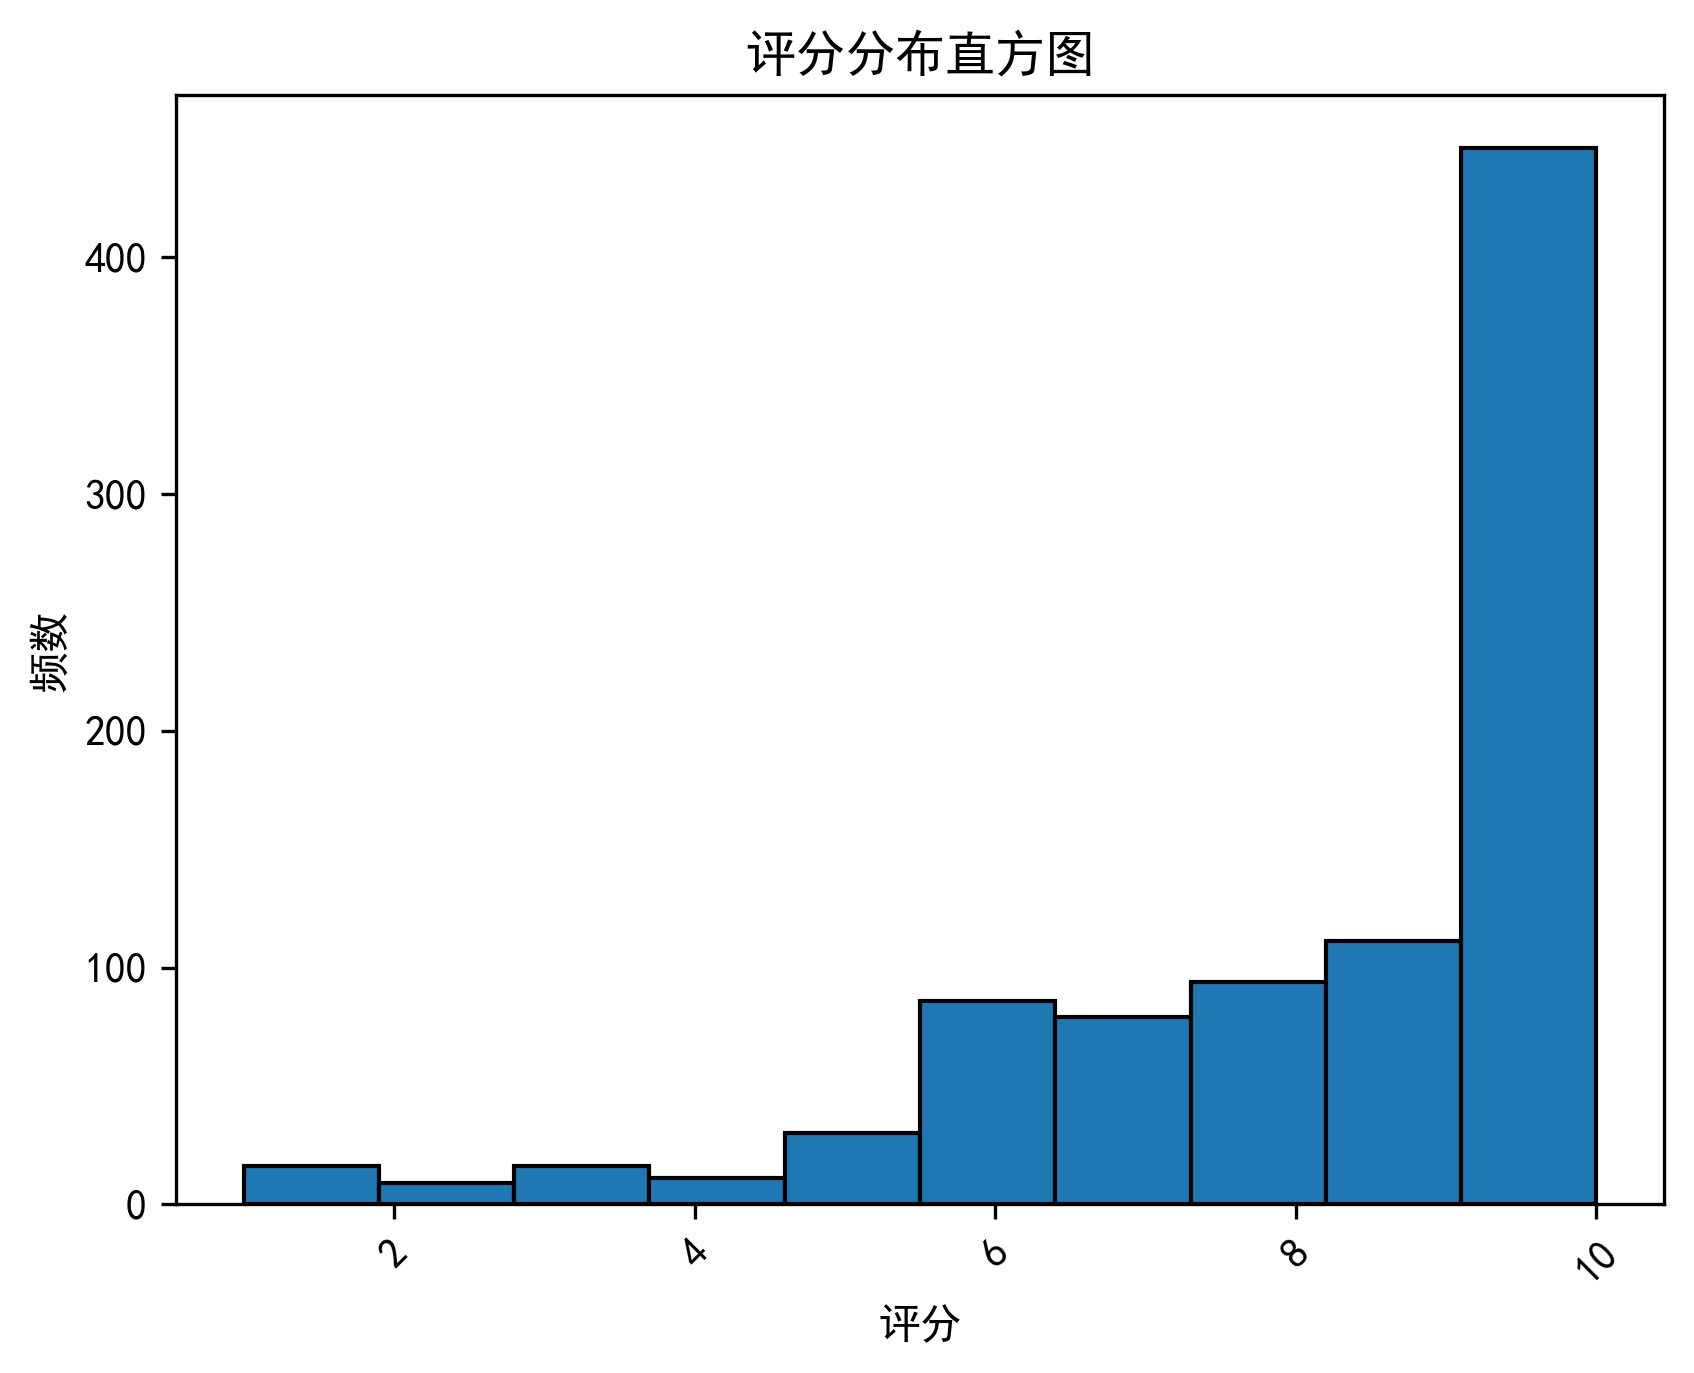

In [26]:
# 一、评分分布情况
# 获取评分的描述性统计信息，并保留两位小数
star_stats = df['star'].describe().round(2).reset_index()
print('评分的描述性统计信息：')
print(star_stats)
# 绘制评分的直方图
plt.hist(df['star'].dropna(), bins=10, edgecolor='black')
plt.xlabel('评分')
plt.xticks(rotation=45)
plt.ylabel('频数')
plt.title('评分分布直方图')
plt.show()

## 4.点赞数和差评数的相关性

点赞数和差评数的皮尔逊相关系数: 0.75，p 值: 0.0


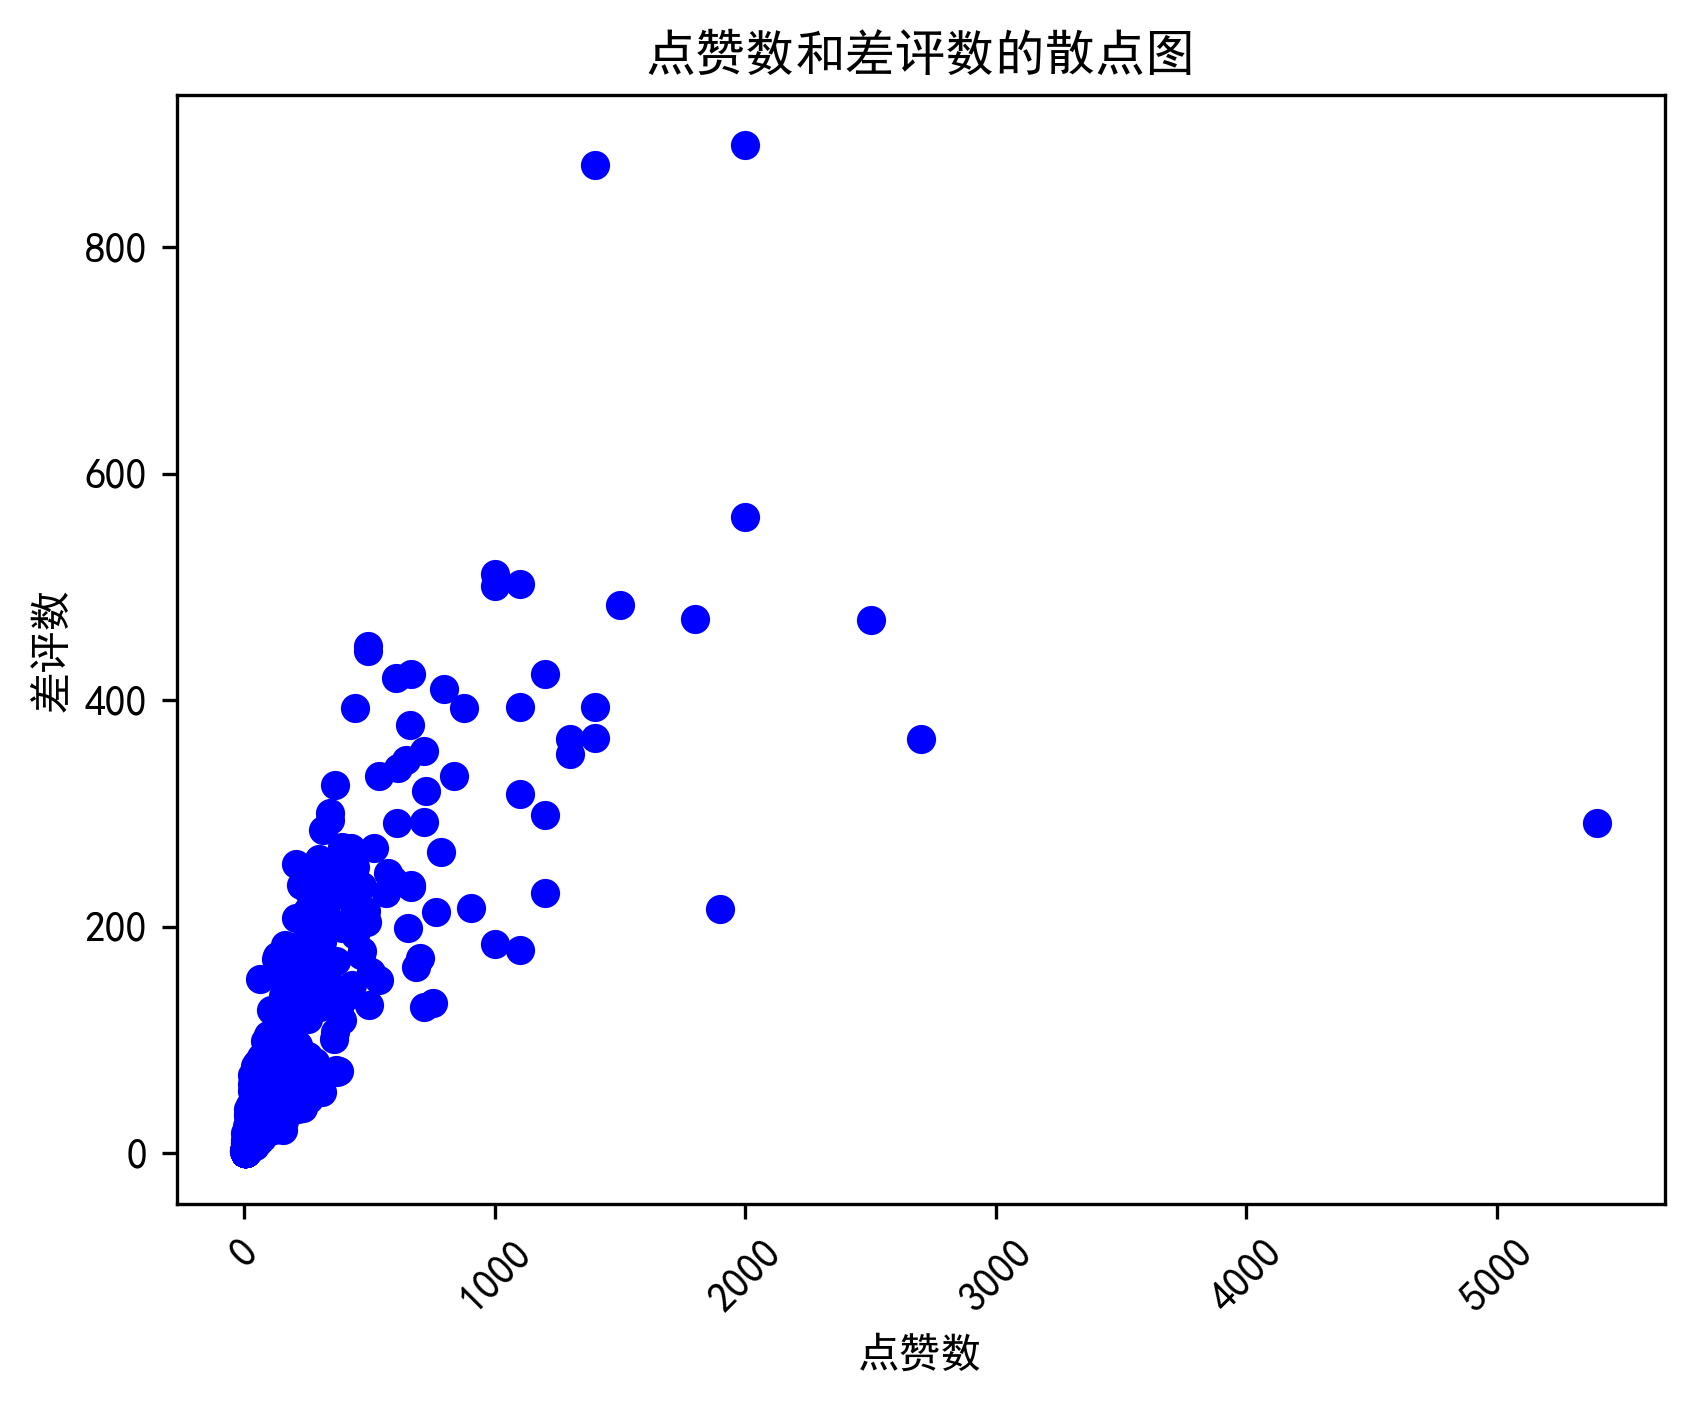

In [ ]:
# 二、点赞数和差评数的相关性
# 计算点赞数和差评数的皮尔逊相关系数和 p 值
correlation, p_value = pearsonr(df['good'], df['bad'])
# 保留两位小数
correlation = round(correlation, 2)
p_value = round(p_value, 2)
print(f'点赞数和差评数的皮尔逊相关系数: {correlation}，p 值: {p_value}')
# 绘制点赞数和差评数的散点图
plt.scatter(df['good'], df['bad'],color='blue')
plt.xlabel('点赞数')
plt.xticks(rotation=45)
plt.ylabel('差评数')
plt.title('点赞数和差评数的散点图')
plt.show()

## 5.不同时间段的评价数量变化趋势

不同日期的评价数量：
          time  评价数量
0   2021-11-02    48
1   2021-11-03     9
2   2021-11-04     8
3   2021-11-05     3
4   2021-11-06     2
..         ...   ...
381 2025-01-01     1
382 2025-01-08     1
383 2025-01-12     1
384 2025-01-15     1
385 2025-01-18     1

[386 rows x 2 columns]


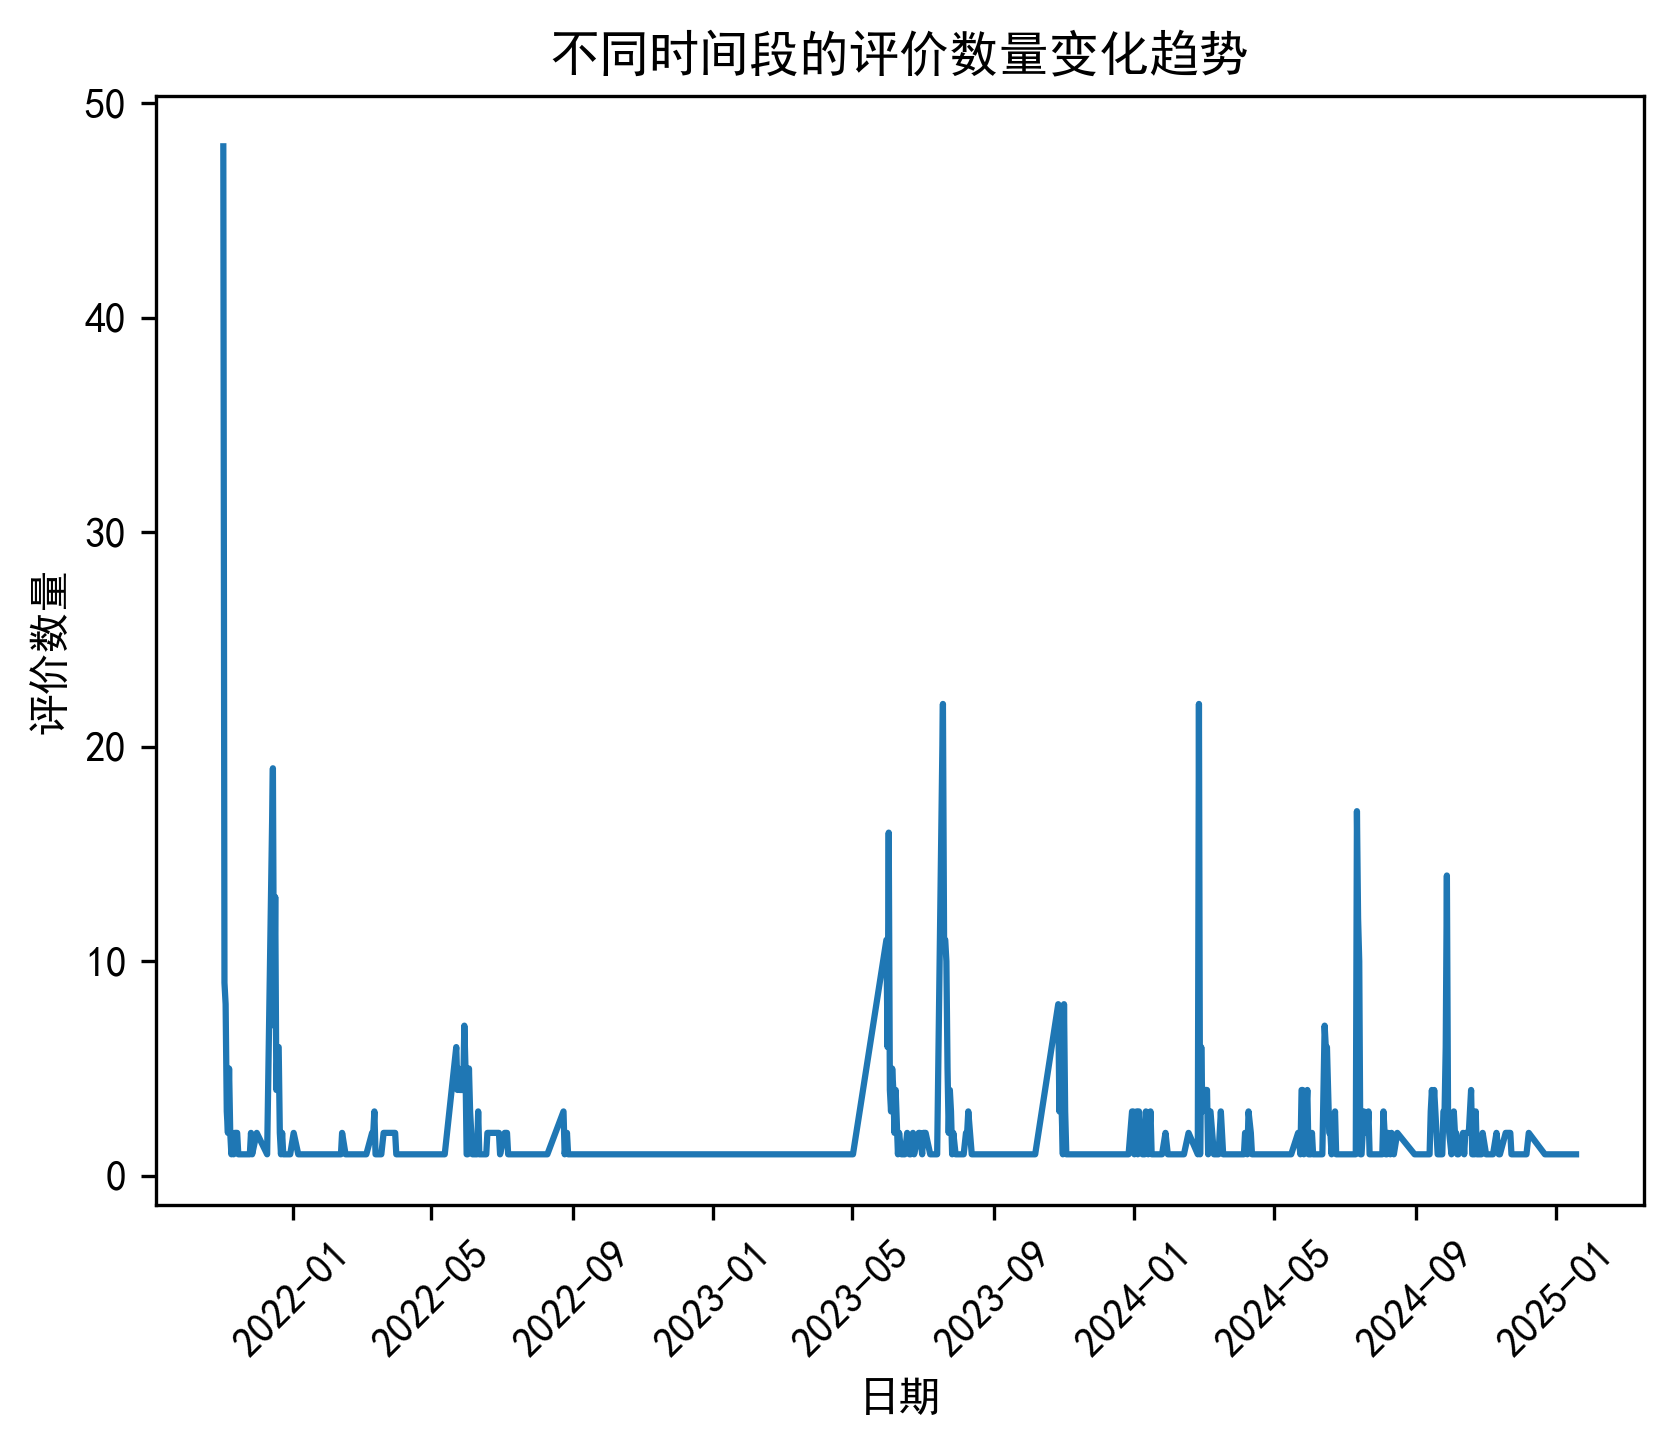

In [32]:
# 三、不同时间段的评价数量变化趋势
# 将 time 列转换为日期时间类型
df['time'] = pd.to_datetime(df['time'], format='%b %d, %Y')
# 按日期统计评价数量
daily_counts = df['time'].value_counts().sort_index().reset_index(name='评价数量')
print('不同日期的评价数量：')
print(daily_counts)
# 绘制折线图
plt.plot(daily_counts['time'], daily_counts['评价数量'])
plt.xlabel('日期')
plt.ylabel('评价数量')
plt.title('不同时间段的评价数量变化趋势')
plt.xticks(rotation=45)
plt.show()


## 6.高分评价（大于等于 8）和低分评价（小于等于 2）的特征

In [33]:
# 提取高分评价和低分评价
high_rating = df[df['star'] >= 8]
low_rating = df[df['star'] <= 2]
# 统计高分评价和低分评价的数量
high_rating_count = high_rating.shape[0]
low_rating_count = low_rating.shape[0]
# 统计高分评价和低分评价中不同点赞数和差评数的均值，并保留两位小数
high_rating_good_mean = round(high_rating['good'].mean(), 2)
high_rating_bad_mean = round(high_rating['bad'].mean(), 2)
low_rating_good_mean = round(low_rating['good'].mean(), 2)
low_rating_bad_mean = round(low_rating['bad'].mean(), 2)
# 输出结果
print(f'高分评价数量：{high_rating_count}，点赞数均值：{high_rating_good_mean}，差评数均值：{high_rating_bad_mean}')
print(f'低分评价数量：{low_rating_count}，点赞数均值：{low_rating_good_mean}，差评数均值：{low_rating_bad_mean}')


高分评价数量：651，点赞数均值：123.34，差评数均值：51.93
低分评价数量：25，点赞数均值：73.56，差评数均值：57.28


## 7.评论词频统计

前20个出现频率最高的词：
[('movie', 2190), ('film', 1209), ('one', 844), ('story', 746), ('like', 649), ('good', 452), ('best', 452), ('great', 443), ('time', 441), ('first', 418), ('much', 418), ('also', 411), ('movies', 401), ('really', 383), ('characters', 379), ('watch', 368), ('character', 359), ('even', 346), ('way', 345), ('well', 340), ('see', 339), ('part', 301), ('could', 301), ('would', 272), ('get', 268), ('made', 264), ('every', 261), ('oppenheimer', 257), ('scenes', 255), ('many', 253), ('think', 241), ('acting', 233), ('feel', 231), ('people', 218), ('end', 211), ('action', 209), ('life', 208), ('films', 207), ('amazing', 206), ('love', 201), ('nolan', 201), ('better', 199), ('animation', 198), ('make', 197), ('plot', 195), ('still', 193), ('scene', 191), ('real', 187), ('emotional', 185), ('dune', 185)]


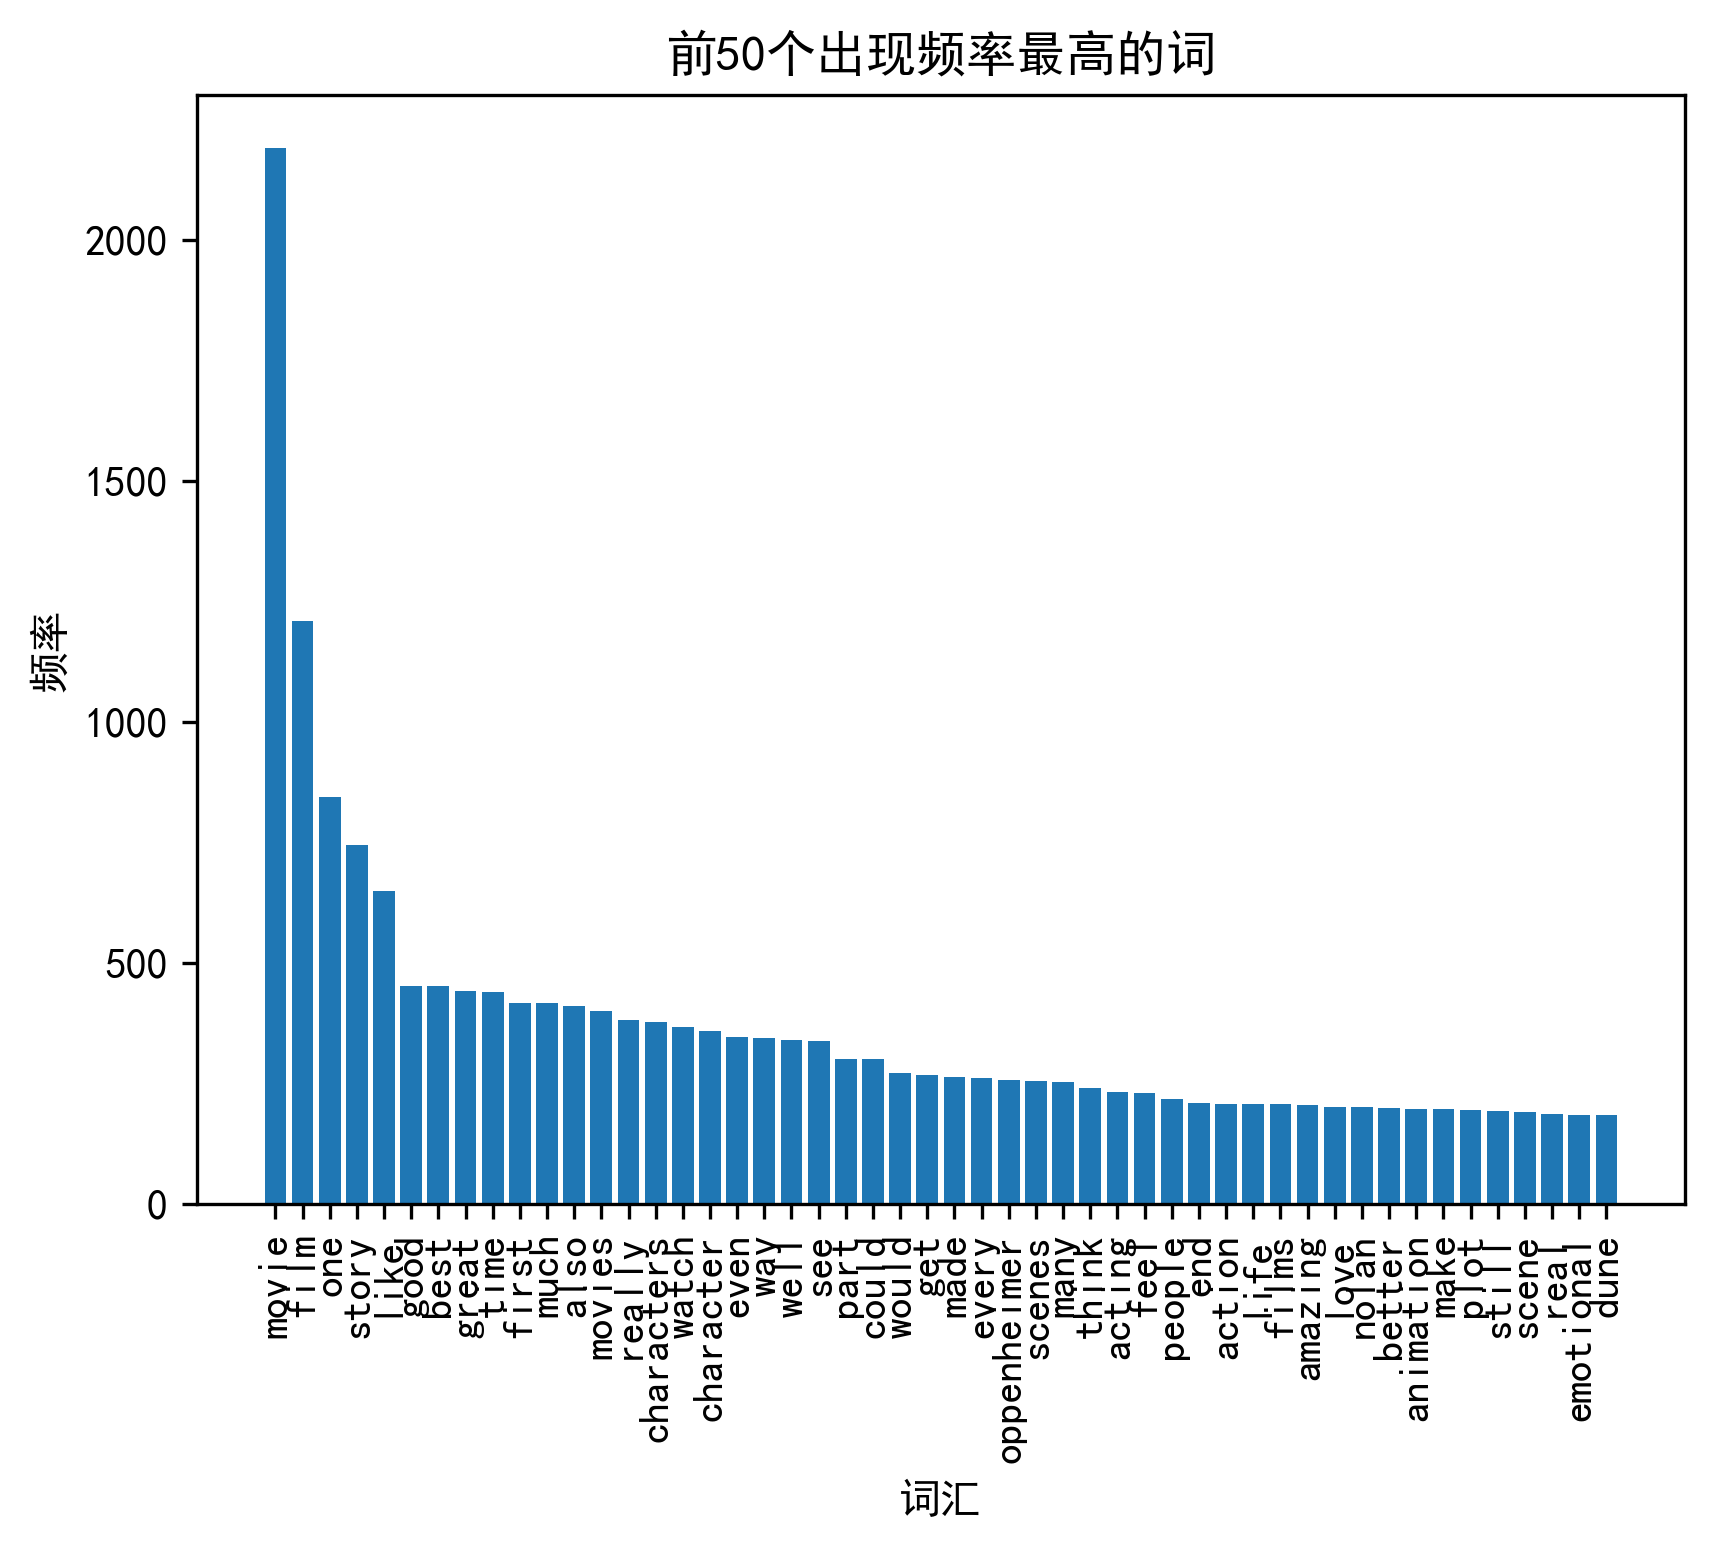

In [34]:
# 获取英文停用词
stop_words = set(stopwords.words('english'))

# 定义函数来进行文本预处理
def preprocess_text(text):
    # 将文本转换为小写
    text = text.lower()
    # 分词
    tokens = word_tokenize(text)
    # 去除停用词和非字母字符
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return filtered_tokens

# 对影评内容进行预处理
df['processed_sentences'] = df['content'].apply(preprocess_text)

# 合并所有影评的词
all_words = [word for sublist in df['processed_sentences'] for word in sublist]

# 统计词频
word_freq = Counter(all_words)

# 获取前50个出现频率最高的词
top_50_words = word_freq.most_common(50)

print('前20个出现频率最高的词：')
print(top_50_words)
# 提取词和频率用于绘图
words, frequencies = zip(*top_50_words)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制柱状图
plt.bar(words, frequencies)
plt.xlabel('词汇')
plt.xticks(rotation=90)
plt.ylabel('频率')
plt.title('前50个出现频率最高的词')
plt.show()

## 8.词云图

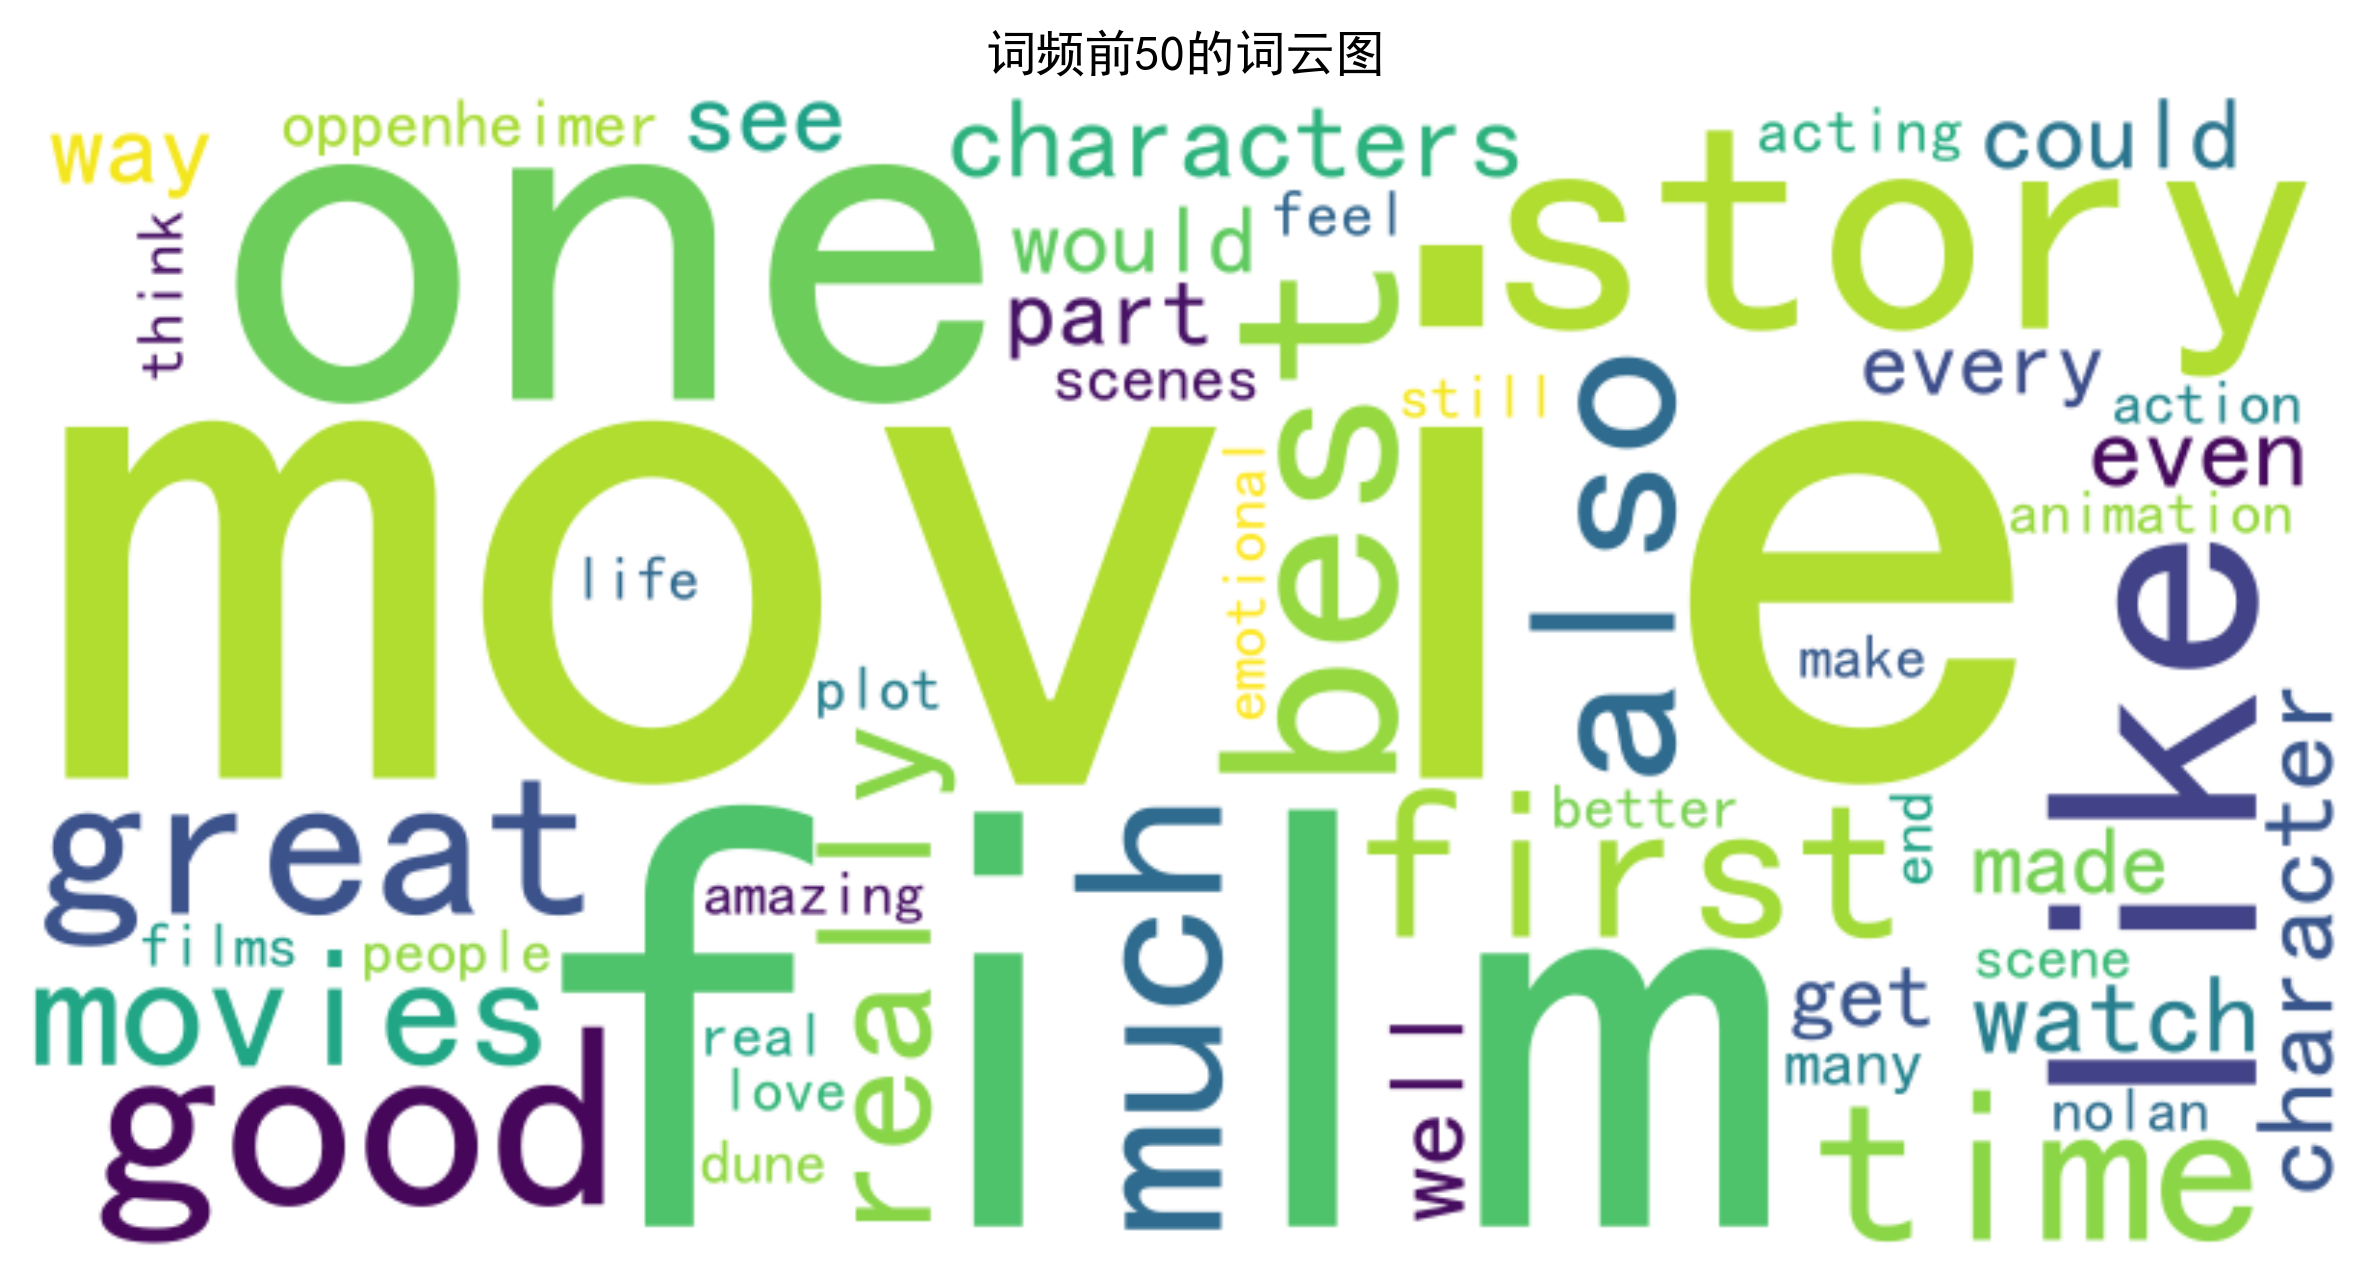

In [35]:
# 转换为适合词云生成的字典格式
word_freq_dict = dict(top_50_words)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体，这里以 SimHei 为例，你可以根据自己系统更换合适的中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

# 生成词云
wordcloud = WordCloud(font_path='C:/Windows/Fonts/simhei.ttf',  # 指定中文字体路径，根据实际情况修改
                      background_color='white',
                      width=800,
                      height=400).generate_from_frequencies(word_freq_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('词频前50的词云图')
plt.show()